# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
df['sex'].replace({0:'feminino', 1:'masculino'}, inplace=True)

In [5]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True, margins_name='Total').rename(columns={0:'Saudáveis', 1:'Doentes'})
tab

flag_doente,Saudáveis,Doentes,Total
sex,,,
feminino,72,25,97
masculino,92,114,206
Total,164,139,303


In [6]:
# Substituir os valores de 0 e 1 por 'feminino' e 'masculino'
df['sex'].replace({0: 'feminino', 1: 'masculino'}, inplace=True)

# Criar a tabela bivariada
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True, margins_name='Total').rename(columns={0:'Saudáveis', 1:'Doentes'})

# Calcular as estatísticas solicitadas
tab['% Doentes'] = round(tab['Doentes'] / tab['Total'], 2)
tab['Odds Doentes'] = round(tab['Doentes'] / tab['Saudáveis'],2)
tab['Odds Ratio'] = round(tab['Odds Doentes'] / tab.loc['Total', 'Odds Doentes'],2)
tab['Logito Doentes'] = round(np.log(tab['Odds Doentes']),2)
tab['(WOE)'] = round(np.log(tab['Odds Ratio']),2)
tab

flag_doente,Saudáveis,Doentes,Total,% Doentes,Odds Doentes,Odds Ratio,Logito Doentes,(WOE)
sex,,,,,,,,
feminino,72,25,97,0.26,0.35,0.41,-1.05,-0.89
masculino,92,114,206,0.55,1.24,1.46,0.22,0.38
Total,164,139,303,0.46,0.85,1.00,-0.16,0.00


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [7]:
# Categorizando a variável "age" em 5 grupos usando pd.qcut
def format_age_group(age_group):
    start, end = age_group.left, age_group.right
    return f"{int(start)}-{int(end)}"

df['age_group'] = pd.qcut(df['age'], q=5)
df['age_group'] = df['age_group'].apply(format_age_group)

# Criando a tabela bivariada
tab_age = pd.crosstab(df['age_group'], df['flag_doente'], margins=True, margins_name='Total').rename(columns={0: 'Saudáveis', 1: 'Doentes'})

# Calculando as estatísticas solicitadas
tab_age['% Doentes'] = round(tab_age['Doentes'] / tab_age['Total'], 2)
tab_age['Odds Doentes'] = round(tab_age['Doentes'] / tab_age['Saudáveis'], 2)
tab_age['Odds Ratio'] = round(tab_age['Odds Doentes'] / tab_age.loc['Total', 'Odds Doentes'], 2)
tab_age['Logito Doentes'] = round(np.log(tab_age['Odds Doentes']), 2)
tab_age['(WOE)'] = round(np.log(tab_age['Odds Ratio']), 2)

# Calculando o valor médio da variável "age" em cada grupo
tab_age['Idade Média'] = df.groupby('age_group')['age'].mean().round(2)

# Exibindo a tabela bivariada
tab_age

flag_doente,Saudáveis,Doentes,Total,% Doentes,Odds Doentes,Odds Ratio,Logito Doentes,(WOE),Idade Média
age_group,,,,,,,,,
28-45,47,16,63,0.25,0.34,0.40,-1.08,-0.92,41.22
45-53,42,22,64,0.34,0.52,0.61,-0.65,-0.49,50.00
53-58,32,39,71,0.55,1.22,1.44,0.20,0.36,56.21
58-62,13,32,45,0.71,2.46,2.89,0.90,1.06,60.36
62-77,30,30,60,0.50,1.00,1.18,0.00,0.17,66.52
Total,164,139,303,0.46,0.85,1.00,-0.16,0.00,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

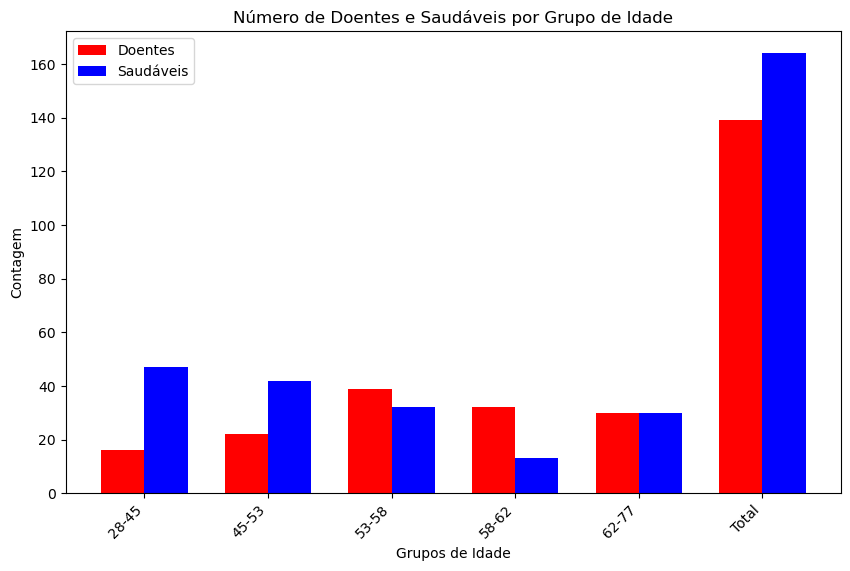

In [8]:
# Criando o gráfico de barras lado a lado com legendas das idades
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(tab_age.index))
plt.bar(x - width/2, tab_age['Doentes'], width, color='red', label='Doentes')
plt.bar(x + width/2, tab_age['Saudáveis'], width, color='blue', label='Saudáveis')
plt.xticks(x, tab_age.index, rotation=45, ha='right')
plt.xlabel('Grupos de Idade')
plt.ylabel('Contagem')
plt.title('Número de Doentes e Saudáveis por Grupo de Idade')
plt.legend()
plt.show();